In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
from matplotlib import style
plt.style.use(['dark_background'])
style.use('seaborn-ticks')
sns.set(color_codes=True)

In [4]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2022-03-15 19:21:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.02s   

2022-03-15 19:21:04 (2.08 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



In [5]:
df = pd.read_csv('teleCust1000t.csv')

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [8]:
col = 'custcat'

In [9]:
feature_set = df.loc[:,df.columns != col] 

In [10]:
output_class = df[col]

In [11]:
feature_set = preprocessing.StandardScaler().fit(feature_set).transform(feature_set.astype(float))

In [12]:
x_train,x_test,y_train,y_test = train_test_split(feature_set,output_class,test_size = 0.2,random_state = 4)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
ls = list(range(1,100))
train_accuracy_ls = []
test_accuracy_ls=[]

In [17]:
for k in ls:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    train_accuracy_ls.append(accuracy_score(y_train, neigh.predict(x_train)))
    test_accuracy_ls.append(accuracy_score(y_test, y_pred))

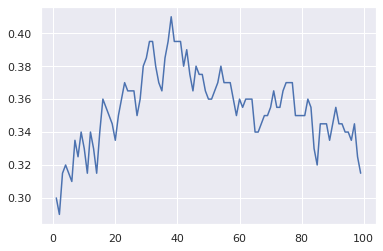

In [19]:
sns.lineplot(x = ls,y = test_accuracy_ls);